In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import time

# Univariate Linear Regression

In [2]:
data=pd.read_csv("D:/Sem 5/ML/ex1data1.txt", header=None)
data.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
data.describe()

,0,1
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [4]:
data.columns = ['Population', 'Profit'] #assigning column names

In [5]:
data.isnull().sum()

Population    0
Profit        0
dtype: int64

Text(0.5, 1.0, 'Profit vs Population')

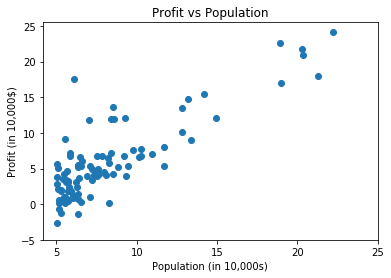

In [6]:
plt.scatter(data['Population'], data['Profit'])
plt.xticks(np.arange(5,30,step=5))
plt.yticks(np.arange(-5,30,step=5))
plt.xlabel('Population (in 10,000s)')
plt.ylabel('Profit (in 10,000$)')
plt.title('Profit vs Population')

## Cost Function  J(θ)

In [7]:
def computeCost(X,y,theta):
    """
    Take in a numpy arary X,y,theta and get cost function using theta as parameter in a linear regression model
    """
    m = len(y)
    predictions = X.dot(theta)
    square_err = (predictions - y)**2
    
    return 1/(m)*np.sum(square_err)

In [8]:
data['x0'] = 1

In [9]:
data_val = data.values
m =  len(data_val[:-1])
X = data[['x0','Population']].iloc[:-1].values
y = data['Profit'][:-1].values.reshape(m,1)
theta = np.zeros((2,1))

m, X.shape, y.shape, theta.shape

(96, (96, 2), (96, 1), (2, 1))

In [10]:
# h(θ) = x0θ0 +x1θ1 ....(x0 = 1)

In [11]:
computeCost(X,y,theta)

64.80968355754062

## Gradient Descent

In [12]:
def gradientDescent(X,y,theta,alpha,num_iters):
    """
    Take numpy array for X,y,theta and update theta for every iteration of gradient steps
    Return theta and the list of cost of theta during each iteration
    """
    
    m = len(y)
    J_history = []
    for i in range(num_iters):
        predictions = X.dot(theta)
        error = np.dot(X.transpose(), (predictions-y))
        descent = alpha * 1/m * error
        theta-=descent
        J_history.append(computeCost(X,y,theta))
        
    return theta, J_history

In [13]:
theta, J_history = gradientDescent(X,y,theta,0.001, 2000)

In [14]:
print(f"h(x) = {str(round(theta[0,0],2))} + {str(round(theta[1,0],2))}x1")

h(x) = -1.11 + 0.92x1


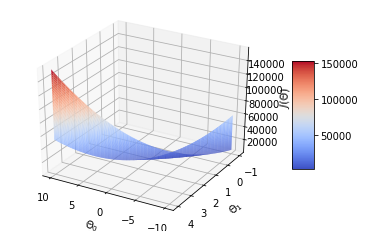

In [15]:
from mpl_toolkits.mplot3d import Axes3D
#Generating values for theta0, theta1 and the resulting cost value
theta0_vals=np.linspace(-10,10,100)
theta1_vals=np.linspace(-1,4,100)
J_vals=np.zeros((len(theta0_vals),len(theta1_vals)))
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t=np.array([theta0_vals[i],theta1_vals[j]])
        J_vals[i,j]=computeCost(X,y,t)
#Generating the surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf=ax.plot_surface(theta0_vals,theta1_vals,J_vals,cmap="coolwarm")
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel("$\Theta_0$")
ax.set_ylabel("$\Theta_1$")
ax.set_zlabel("$J(\Theta)$")
#rotate for better angle
ax.view_init(30,120)

Text(0.5, 1.0, 'Cost function using Gradient Descent')

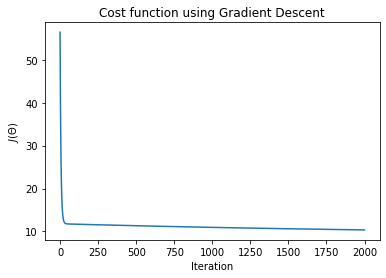

In [16]:
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

Text(0.5, 1.0, 'Profit vs Population')

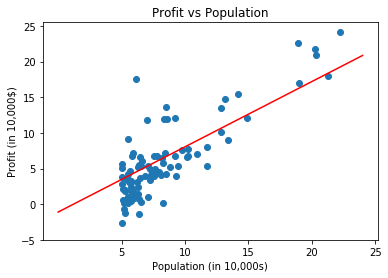

In [17]:
plt.scatter(data['Population'], data['Profit'])
x_value = [x for x in range(25)]
y_value = [x*theta[1] + theta[0] for x in x_value]
plt.plot(x_value, y_value, color = 'r')
plt.xticks(np.arange(5,30,step=5))
plt.yticks(np.arange(-5,30,step=5))
plt.xlabel('Population (in 10,000s)')
plt.ylabel('Profit (in 10,000$)')
plt.title('Profit vs Population')

In [18]:
def predict(x,theta):
    """
    Takes in numpy array x and theta and returns predicted value of y
    """
    predictions = np.dot(theta.transpose(),x)
    return predictions[0]
    

In [19]:
data.tail(1)

,Population,Profit,x0
96,5.4369,0.61705,1


In [20]:
predict1 = predict(data[['x0','Population']].iloc[-1].values, theta)*10000
print(f'For a population of 6170 the predicted profit is ${predict1}')

For a population of 6170 the predicted profit is $38686.246103378166


# TODO: Configure code for multivariate linear regression

In [21]:
hw = pd.read_csv("D:/Sem 5/ML/ex1data2.txt", header=None)
hw.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [22]:
hw.columns = ["Size","Num_bedrooms","Price"]
hw.head(1)

,Size,Num_bedrooms,Price
0,2104,3,399900


In [23]:
hw.describe()

,Size,Num_bedrooms,Price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


In [24]:
hw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Size          47 non-null     int64
 1   Num_bedrooms  47 non-null     int64
 2   Price         47 non-null     int64
dtypes: int64(3)
memory usage: 1.2 KB


In [25]:
hw.isnull().sum()

Size            0
Num_bedrooms    0
Price           0
dtype: int64

# Price vs Size of house and Price vs No. of bedrooms

Text(0.5, 1.0, 'Price vs Size')

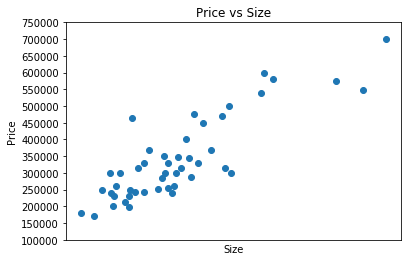

In [26]:
plt.scatter(hw['Size'], hw['Price'])
plt.xticks(np.arange(500,500,step=500))
plt.yticks(np.arange(100000,800000,step=50000))
plt.xlabel('Size')
plt.ylabel('Price')
plt.title('Price vs Size')

Text(0.5, 1.0, 'Price vs Num_bedrooms')

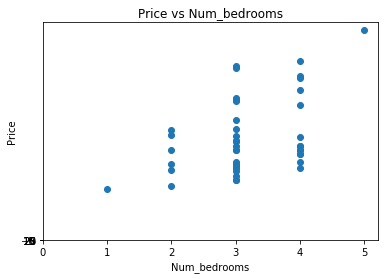

In [27]:
plt.scatter(hw['Num_bedrooms'], hw['Price'])
plt.xticks(np.arange(0,6,step=1))
plt.yticks(np.arange(-5,30,step=5))
plt.xlabel('Num_bedrooms')
plt.ylabel('Price')
plt.title('Price vs Num_bedrooms')

# Scaling the column "Size"

In [28]:
from sklearn.preprocessing import MinMaxScaler
col = ["Size","Price"]
scaler = MinMaxScaler()

hw[col] = pd.DataFrame(scaler.fit_transform(hw[col]),columns = hw[col].columns)

# Defining X and y

In [29]:
X = np.array(hw.drop("Price",axis =1)[:-1])
y = np.array(hw["Price"][:-1])
X.shape,y.shape

((46, 2), (46,))

In [30]:
y = y.reshape(y.shape[0],1)
X = np.c_[np.ones(X.shape[0]),X]
X.shape, y.shape

((46, 3), (46, 1))

# Defining functions

In [31]:
def computeCost(X,y,theta):
    """
    Take in a numpy arary X,y,theta and get cost function using theta as parameter in a linear regression model
    """
    m = y.size
    h_theta = np.dot(X,theta) #Predictions
    error = (h_theta - y)
    cost = (1/(2*m))*np.dot(error.T,error)
    return cost

In [32]:
def gradientDescent(X,y,theta,alpha,num_iters):
    """
    Take numpy array for X,y,theta and update theta for every iteration of gradient steps
    Return theta and the list of cost of theta during each iteration
    """
    
    m = len(y)
    past_cost = []
    past_theta = [theta]
    for i in range(num_iters):
        h_theta = np.dot(X,theta)
        error =  (h_theta-y)
        past_cost.append(computeCost(X,y,theta))
        descent = alpha * 1/m *np.dot(X.T,error)
        theta-=descent
        past_theta.append(theta)
        
    return past_theta, past_cost,i

In [45]:
def predict(x,theta):
    """
    Takes in numpy array x and theta and returns predicted value of y
    """
    predictions = np.dot(theta.T,x)
    return predictions[0]

# Declaring $\theta$ and $\alpha$ and number of iterations

In [34]:
np.random.seed(1111)
theta = np.random.rand(X.shape[1],1)
alpha = 0.01
num_iters = 5000

# Performing regression

In [35]:
import time
start = time.time()
past_theta,past_cost,stop = gradientDescent(X,y,theta,alpha,num_iters)
timeTaken = time.time() -start

In [36]:
best_theta = past_theta[-1]
best_cost = past_cost[-1]

In [37]:
print(f'The model performed {stop} iterations out of {num_iters}.')
print(f'Best Theta: {best_theta}')
print(f'Best cost: {best_cost}')

The model performed 4999 iterations out of 5000.
Best Theta: [[ 0.06027362]
 [ 0.93572888]
 [-0.01125156]]
Best cost: [[0.00743669]]


In [53]:
print(f'h(theta) = {str(round(best_theta[0,0],5))} + {str(round(best_theta[0,0],5))}x1 + {str(round(best_theta[0,0],5))}x2')
print(f'Time taken: {timeTaken}')
print(f'Accuracy: {round(r2_score(y,predict(X,best_theta),4))*100}%')

h(theta) = 0.06027 + 0.06027x1 + 0.06027x2
Time taken: 0.05385303497314453


ValueError: shapes (1,3) and (46,3) not aligned: 3 (dim 1) != 46 (dim 0)

# Plotting cost

In [40]:
cost = np.asarray(past_cost).reshape((len(past_cost),1))
cost.shape

(5000, 1)

<function matplotlib.pyplot.show(*args, **kw)>

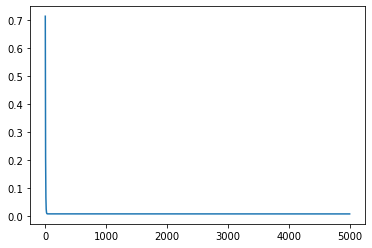

In [41]:
plt.plot(cost)
plt.show

# Predicting price for test data

In [42]:
hw.tail(1)

,Size,Num_bedrooms,Price
46,0.096801,3,0.131321


In [47]:
from sklearn.metrics import r2_score
prediction = predict(X[-1],best_theta)*1000000
print(f'For house of size 968 sq.ft the predicted price is :${str(prediction)}')

For house of size 968 sq.ft the predicted price is :$273328.3006931557


ValueError: shapes (1,3) and (46,3) not aligned: 3 (dim 1) != 46 (dim 0)

# Comparing the parameters

In [44]:
print(f'Parameters from StatsModels: {sm.OLS(y,X).fit().params()}')
print(f'Parameters from ScikitLearn: {LinearRegression().fit(X,y).coef_}')
print(f'Parameters from GradientDescent: {best_theta.reshape((3,))}')

TypeError: 'numpy.ndarray' object is not callable